<a href="https://colab.research.google.com/github/erinda1/CT-Towns-Census-Data-2020/blob/main/Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bike Sharing Ridership Analysis

Total Ridership Over Time


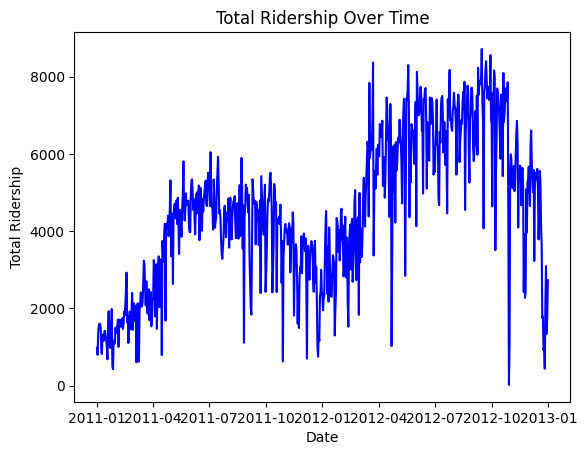


Total Ridership by Season


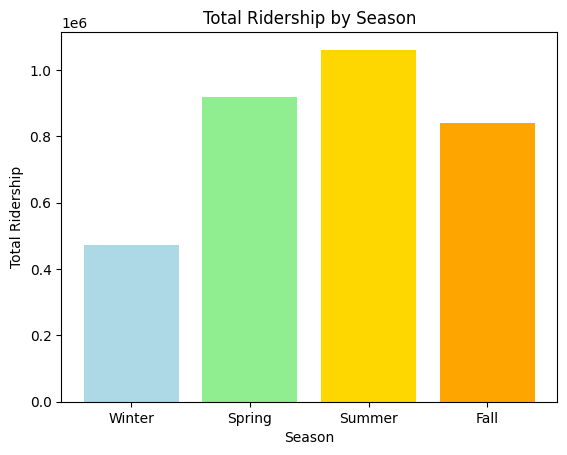

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print('Bike Sharing Ridership Analysis')

url = "https://raw.githubusercontent.com/iantonios/dsc205/refs/heads/main/bike_sharing.csv"
df = pd.read_csv(url)

df['dteday'] = pd.to_datetime(df['dteday'])
df = df.set_index('dteday')

print('\nTotal Ridership Over Time')

fig1, ax1 = plt.subplots()
ax1.plot(df.index, df['cnt'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Ridership')
ax1.set_title('Total Ridership Over Time')
plt.show()

print('\nTotal Ridership by Season')

season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season_name'] = df['season'].map(season_mapping)
season_totals = df.groupby('season_name')['cnt'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

fig2, ax2 = plt.subplots()
ax2.bar(season_totals.index, season_totals.values, color=['lightblue', 'lightgreen', 'gold', 'orange'])
ax2.set_xlabel('Season')
ax2.set_ylabel('Total Ridership')
ax2.set_title('Total Ridership by Season')
plt.show()



Total Ridership by Month


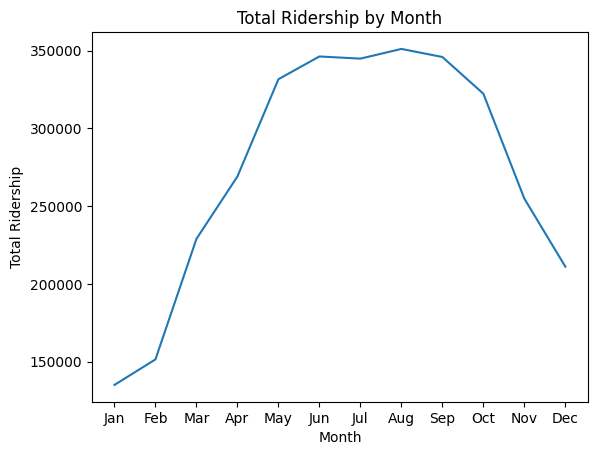

In [ ]:
# prompt: create A line plot of total ridership (column titled cnt) over the course of the entire period.

import matplotlib.pyplot as plt
print('\nTotal Ridership by Month')

monthly_totals = df.groupby(df.index.month)['cnt'].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig3, ax3 = plt.subplots()
ax3.plot(month_names, monthly_totals.values)
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Ridership')
ax3.set_title('Total Ridership by Month')
plt.show()



Total Ridership by Season


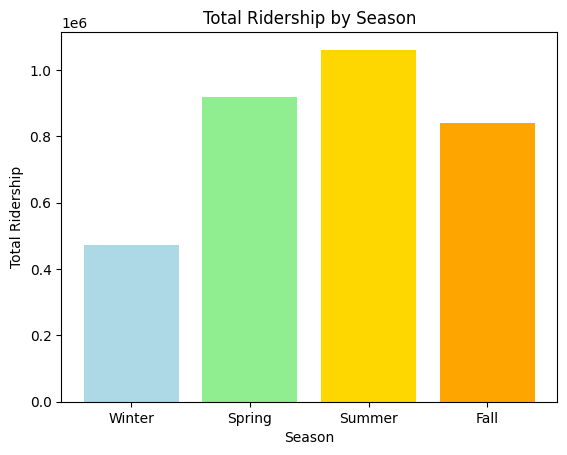

In [ ]:


import matplotlib.pyplot as plt

print('\nTotal Ridership by Season')

season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season_name'] = df['season'].map(season_mapping)
season_totals = df.groupby('season_name')['cnt'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

fig2, ax2 = plt.subplots()
ax2.bar(season_totals.index, season_totals.values, color=['lightblue', 'lightgreen', 'gold', 'orange'])
ax2.set_xlabel('Season')
ax2.set_ylabel('Total Ridership')
ax2.set_title('Total Ridership by Season')
plt.show()


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

print('Bike Sharing Ridership Analysis')

url = "https://raw.githubusercontent.com/iantonios/dsc205/refs/heads/main/bike_sharing.csv"
df = pd.read_csv(url)

df['dteday'] = pd.to_datetime(df['dteday'])
df = df.set_index('dteday')

# Create the radio button widget
rolling_avg_options = widgets.RadioButtons(
    options=['7-day average', '14-day average', 'Total ridership by week'],
    description='Rolling Average:',
    disabled=False
)

# Define a function to update the plot based on the selected option
def update_plot(change):
    selected_option = change.new

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size

    if selected_option == '7-day average':
        df['7-day_rolling_avg'] = df['cnt'].rolling(window=7).mean()
        ax.plot(df.index, df['7-day_rolling_avg'], label='7-Day Rolling Average', color='blue')
        ax.set_title('7-Day Rolling Average of Total Ridership')
    elif selected_option == '14-day average':
        df['14-day_rolling_avg'] = df['cnt'].rolling(window=14).mean()
        ax.plot(df.index, df['14-day_rolling_avg'], label='14-Day Rolling Average', color='green')
        ax.set_title('14-Day Rolling Average of Total Ridership')
    elif selected_option == 'Total ridership by week':
        weekly_ridership = df['cnt'].resample('W').sum()
        ax.plot(weekly_ridership.index, weekly_ridership.values, label='Weekly Total', color='red')
        ax.set_title('Total Ridership by Week')

    ax.set_xlabel('Date')
    ax.set_ylabel('Total Ridership')
    ax.legend()  # Show legend
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Observe the widget for changes and call the update_plot function
rolling_avg_options.observe(update_plot, names='value')

# Display the widget
display(rolling_avg_options)


Bike Sharing Ridership Analysis


RadioButtons(description='Rolling Average:', options=('7-day average', '14-day average', 'Total ridership by w…